# Polynomial Regression

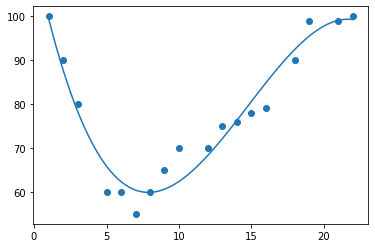

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = np.poly1d(np.polyfit(x, y, 3))

myline = np.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

In [2]:
from sklearn.preprocessing import PolynomialFeatures

In [3]:
X = np.arange(6).reshape(3, 2)

In [4]:
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [5]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

# Ridge Regression

In [6]:
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge

In [7]:
X, y, coefficients = make_regression(
    n_samples=50,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=5,
    coef=True,
    random_state=2
)

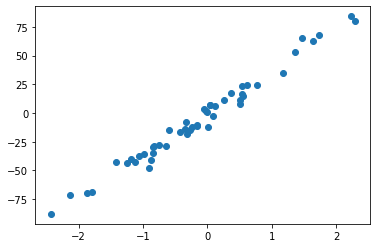

In [8]:
plt.scatter(X, y)

In [9]:
rr = Ridge(alpha=0.11)
rr.fit(X, y)
w = rr.coef_

In [10]:
w

array([36.53736787])

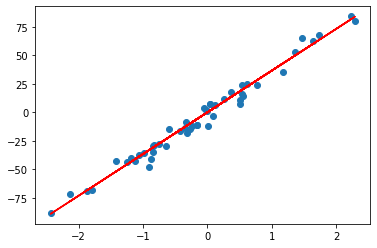

In [11]:
plt.scatter(X, y)
plt.plot(X, w*X, c='red')

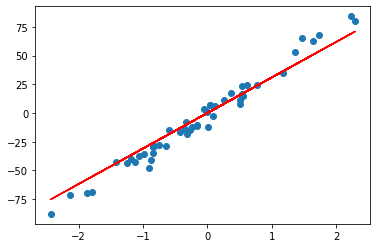

In [12]:
rr = Ridge(alpha=10)
rr.fit(X, y)
w = rr.coef_[0]
plt.scatter(X, y)
plt.plot(X, w*X, c='red')

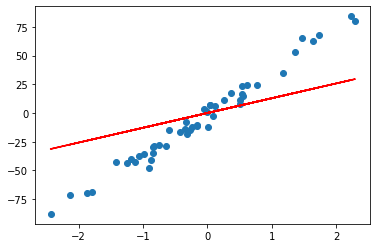

In [13]:
rr = Ridge(alpha=100)
rr.fit(X, y)
w = rr.coef_[0]
plt.scatter(X, y)
plt.plot(X, w*X, c='red')

In [14]:
rr.coef_

array([12.86078768])

Implement function `fit_1d_ridge_regression` that takes two vectors $x$ and $y$ and int lmb, and returns a numpy array ($\beta_0, \beta_1)$, where $\beta_0$ is the intercept of the line, and $\beta_1$ is the slope using ridge regression matrix form.

In [15]:
def fit_1d_ridge_regression(data_vector, response_vector, lmb=1):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    Note: You can avoid the intercept for simplicity
    """
    lenn = len(data_vector)
    
    x_vector = np.array(data_vector)
    y_vector = np.array(response_vector)
    X_matrix = np.c_[np.ones((lenn, 1)), x_vector] #adding first column containing 1's
    
    XX_matrix = X_matrix.T.dot(X_matrix)
    
    
    beta_vector = np.linalg.inv(XX_matrix + lmb * np.identity(len(XX_matrix))).dot(X_matrix.T).dot(y_vector) #simply using the formula for regression
    return beta_vector


# recall the ordinary regression code for further comparison
def fit_1d_linear_regression(data_vector, response_vector):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    Note: You can avoid the intercept for simplicity
    """
    x_vector = np.array(data_vector)
    y_vector = np.array(response_vector)
    X_matrix = np.c_[np.ones((len(x_vector), 1)), x_vector] #adding 1-s to as a first column
    
    #TODO
    beta_vector = np.linalg.inv(X_matrix.T.dot(X_matrix)).dot(X_matrix.T).dot(y_vector) #simply using the formula for regression
    return beta_vector

In [27]:
# the vector of betas from by ridge regression for lmb = 1.11
print("betas from ridge regression for lambda =", 1.11, ":", fit_1d_ridge_regression(X, y, 1.11), '\n')

# sklearn one
rr = Ridge(alpha=1.11)
rr.fit(X, y)
print("sklearn one :", [rr.intercept_, rr.coef_[0]], '\n')

# the vector of betas from by ridge regression for lmb = 0
print("betas from ridge regression for lambda =", 0, ":", fit_1d_ridge_regression(X, y, 0), '\n')
# compare with the results of simple regression
print("betas from simple regression (aka ridge regression for lambda = 0) : ", fit_1d_linear_regression(X, y), '\n' , '\n')


# the vector of betas from by ridge regression for big lmb = 100
print("now, ridge regression for big lambda =", 100, ":", fit_1d_ridge_regression(X, y, 100), '\n')

betas from ridge regression for lambda = 1.11 : [-0.7678468  35.87831939] 

sklearn one : [-0.7851941987949544, 35.87616398994155] 

betas from ridge regression for lambda = 0 : [-0.68242267 36.61159124] 

betas from simple regression (aka ridge regression for lambda = 0) :  [-0.68242267 36.61159124] 
 

now, ridge regression for big lambda = 100 : [-1.32820929 12.98119677] 



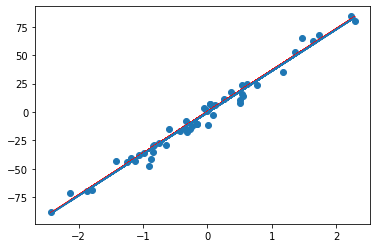

In [29]:
# plots mine vs sklearn
alpha = 0.11
rr = Ridge(alpha)
rr.fit(X, y)
w = rr.coef_[0]

fitted_vector = fit_1d_ridge_regression(X, y, alpha)

plt.scatter(X, y)
plt.plot(X, w*X, c='red')
plt.plot(X, fitted_vector[0] + fitted_vector[1] * X )

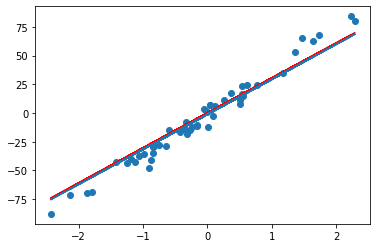

In [30]:
# plots mine vs sklearn
alpha = 11
rr = Ridge(alpha)
rr.fit(X, y)
w = rr.coef_[0]

fitted_vector = fit_1d_ridge_regression(X, y, alpha)

plt.scatter(X, y)
plt.plot(X, w*X, c='red')
plt.plot(X, fitted_vector[0] + fitted_vector[1] * X )

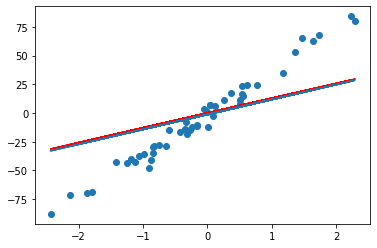

In [31]:
# plots mine vs sklearn
alpha = 100
rr = Ridge(alpha)
rr.fit(X, y)
w = rr.coef_[0]

fitted_vector = fit_1d_ridge_regression(X, y, alpha)

plt.scatter(X, y)
plt.plot(X, w*X, c='red')
plt.plot(X, fitted_vector[0] + fitted_vector[1] * X )

In [ ]:
# we see that both built-in and hand written ridge regression algorithms give the same outputs

In [32]:
# now let's compare the results for higher dimensional data

# take 16 features

X, y, coefficients = make_regression(
    n_samples=50,
    n_features=16,
    n_informative=1,
    n_targets=1,
    noise=5,
    coef=True,
    random_state=2
)

In [34]:
# sklearn's one
rr = Ridge(alpha=0.11, fit_intercept=True)
rr.fit(X, y)

print(rr.intercept_)
print(rr.coef_)

-0.2480508459124482
[ 1.66801411  1.05101262  1.7856848  -1.07128035  1.2706373   0.28431609
 -1.3687782  -1.88555205  5.52038025  1.15578679  1.81028148 -0.64911007
 -2.0258259  -1.38801503  0.94407287 -0.54633741]


In [35]:
# mine
fitted_vector = fit_1d_ridge_regression(X, y, 0.11)
fitted_vector

array([-0.24729855,  1.6681677 ,  1.0511691 ,  1.78577647, -1.0711994 ,
        1.27068124,  0.28428465, -1.36899795, -1.88541743,  5.5204804 ,
        1.15586048,  1.81015022, -0.64913682, -2.02593898, -1.3878997 ,
        0.94418202, -0.54616637])

In [ ]:
# moreless the same, everything works!